# Data Augmentation with Keras

This notebook run a few experiements using the `ImageDataGenerator` class and also demonstrate how to generate data augmentation for a given dataset using Tensorflow and Keras.

## Requirements

Import dependencies.

In [94]:
import numpy as np
import requests
import tensorflow as tf
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from models.dataAugmentationLoader import DataAugmentationLoader
%matplotlib inline

Check if the expected version of Tensorflow is installed.

In [95]:
print('tensorflow version: ', tf.__version__)
assert tf.__version__ == '2.3.0'

tensorflow version:  2.3.0


## ImageDataGenerator Class

Download a sample image of a bird.

In [96]:
response = requests.get('http://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/01/bird.jpg')
#response = requests.get('https://images.all-free-download.com/images/graphiclarge/australia_satin_bower_bird_bird_221260.jpg')
assert response.status_code == 200
sample_bird = Image.open(BytesIO(response.content))

The functions defined below are necessary for the different examples of data augmentation.

In [97]:
def get_sample():
    data = tf.keras.preprocessing.image.img_to_array(sample_bird)
    sample = np.expand_dims(data, 0)
    return sample

def plot_random_images(iterator, num_images = 9):
    for i in range(num_images):
        plt.subplot(330 + 1 + i)
        batch = iterator.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
    plt.show()    

### Horizontal Shift Augmentation

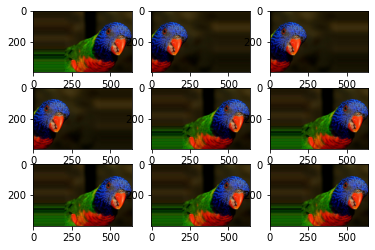

In [98]:
samples = get_sample()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=[-200, 200])
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

### Vertical Shift Augmentation

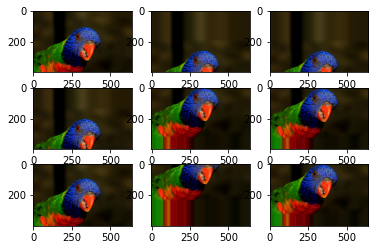

In [99]:
samples = get_sample()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.5)
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

### Horizontal Flip Augmentation

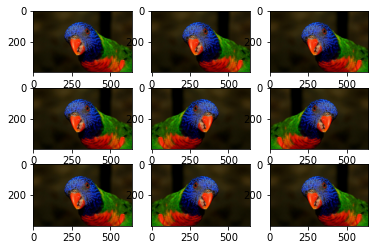

In [100]:
samples = get_sample()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

### Rotation Augmenation

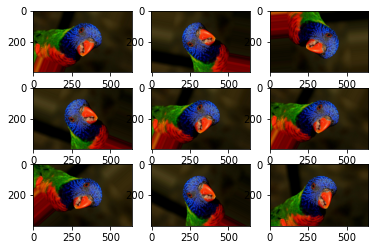

In [101]:
samples = get_sample()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=90)
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

### Brightness Augmentation

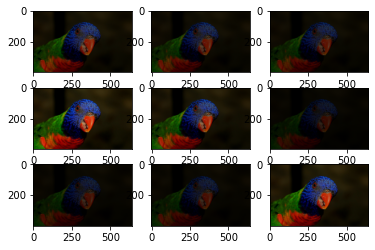

In [102]:
samples = get_sample()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.2, 1.0])
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

### Zoom Augmentation

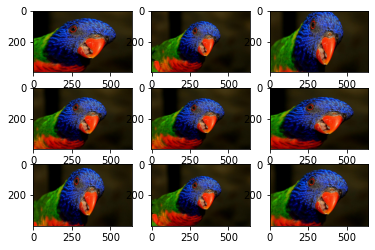

In [103]:
samples = get_sample()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.5, 1.0])
it = datagen.flow(samples, batch_size=1)
plot_random_images(it)

## Data Generators

Defines a small batch size to reduce computation cost for the purpose of this example.

In [104]:
batch_size = 5
image_size = (256, 256)
image_folder = 's2cloudless_imagery'
mask_folder = 's2cloudless_label_imagery'

The `ImageDataGenerator` returns a generator that randomly apply several transformations as specified in the `datagenerator_args` dictionary, such as: horizontal flips, vertical flips, zoom, and rotations up to 45 degrees.

In [105]:
data_augmentation_loader = DataAugmentationLoader(image_folder, mask_folder, batch_size, image_size)

When the `data_augmentation_loader` is called the function `flow_from_directory` from Keras is executed internally. In other words, it reads the images from a given location on the hard drive with no random shuffling, which is important to ensure that images and masks correspond with one another. Each image is read in as 256 x 256 pixels and the batch size is limited by a constant defined above.

In [106]:
data_augmentation_generator = data_augmentation_loader()

Found 182 images belonging to 1 classes.
Found 182 images belonging to 1 classes.


Generate the first batch of pairs (images and masks).

In [107]:
X, Y = next(data_augmentation_generator)

Display the dimensions of the pairs image and mask.

In [108]:
print("image batch size: ", X.shape)
print("mask batch size: ", Y.shape)

image batch size:  (5, 256, 256, 3)
mask batch size:  (5, 256, 256, 1)


Display the dimensions of the first pair on the batch.

In [109]:
print('image size: ', np.shape(np.max(X[0], axis=2)))
print('mask size: ', np.shape(np.max(Y[0], axis=2)))

image size:  (256, 256)
mask size:  (256, 256)


Dispaly all pairs images/masks on the batch for comparison.

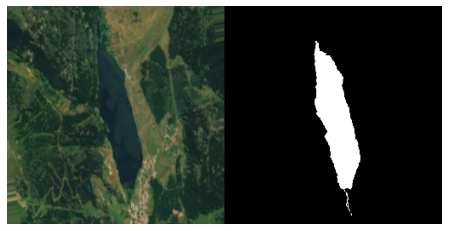

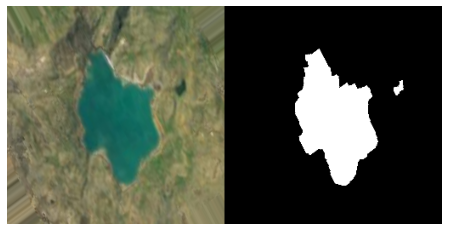

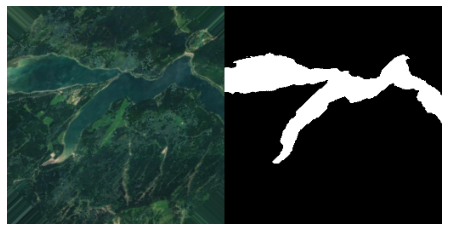

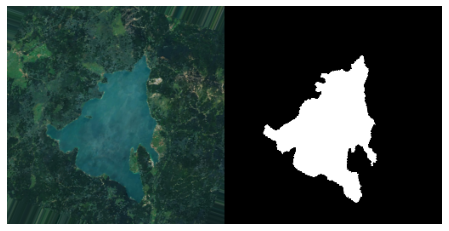

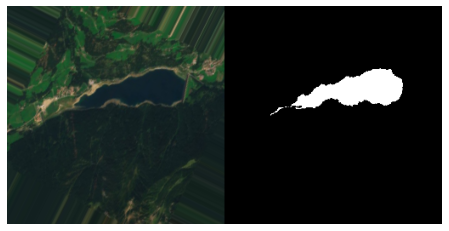

In [110]:
for i in range(batch_size):
    plt.figure(figsize=(8, 4))
    plt.axis('off')
    image = data_augmentation_loader.get_pair(X[i], Y[i])
    plt.imshow(image)